# 深度卷积神经网络（AlexNet）

在LeNet提出后的将近20年里，神经网络一度被其他机器学习方法超越，如支持向量机。虽然LeNet可以在早期的小数据集上取得好的成绩，但是在更大的真实数据集上的表现并不尽如人意。一方面，神经网络计算复杂。虽然20世纪90年代也有过一些针对神经网络的加速硬件，但并没有像之后GPU那样大量普及。因此，训练一个多通道、多层和有大量参数的卷积神经网络在当年很难完成。另一方面，当年研究者还没有大量深入研究参数初始化和非凸优化算法等诸多领域，导致复杂的神经网络的训练通常较困难。

我们在上一节看到，<font color='red'>神经网络可以直接基于图像的原始像素进行分类。这种称为端到端（end-to-end）的方法</font>节省了很多中间步骤。然而，在很长一段时间里更流行的是研究者通过勤劳与智慧所设计并生成的手工特征。这类图像分类研究的主要流程是：

1. 获取图像数据集；
2. 使用已有的特征提取函数生成图像的特征；
3. 使用机器学习模型对图像的特征分类。

当时认为的机器学习部分仅限最后这一步。如果那时候<font color='red'>跟机器学习研究者交谈</font>，他们会认为机器学习既重要又优美。优雅的定理证明了许多分类器的性质。机器学习领域生机勃勃、严谨而且极其有用。然而，如果跟<font color='red'>计算机视觉研究者交谈</font>，则是另外一幅景象。他们会告诉你图像识别里“不可告人”的现实是：计算机视觉流程中真正重要的是数据和特征。也就是说，使用较干净的数据集和较有效的特征甚至比机器学习模型的选择对图像分类结果的影响更大。


## 学习特征表示

既然特征如此重要，它该如何表示呢？

我们已经提到，在相当长的时间里，特征都是基于各式各样手工设计的函数从数据中提取的。事实上，不少研究者通过提出新的特征提取函数不断改进图像分类结果。这一度为计算机视觉的发展做出了重要贡献。

然而，另一些研究者则持异议。他们认为特征本身也应该由学习得来。他们还相信，为了表征足够复杂的输入，特征本身应该分级表示。持这一想法的研究者相信，多层神经网络可能可以学得数据的多级表征，并逐级表示越来越抽象的概念或模式。以图像分类为例，并回忆[“二维卷积层”](1-conv-layer.ipynb)一节中物体边缘检测的例子。<font color='red'>在多层神经网络中，图像的第一级的表示可以是在特定的位置和⻆度是否出现边缘；而第二级的表示说不定能够将这些边缘组合出有趣的模式，如花纹；在第三级的表示中，也许上一级的花纹能进一步汇合成对应物体特定部位的模式。这样逐级表示下去，最终，模型能够较容易根据最后一级的表示完成分类任务。</font>需要强调的是，输入的逐级表示由多层模型中的参数决定，而这些参数都是学出来的。

尽管一直有一群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然而很长一段时间里这些野心都未能实现。这其中有诸多因素值得我们一一分析。


### 缺失要素一：数据

包含许多特征的深度模型需要大量的有标签的数据才能表现得比其他经典方法更好。限于早期计算机有限的存储和90年代有限的研究预算，大部分研究只基于小的公开数据集。例如，不少研究论文基于加州大学欧文分校（UCI）提供的若干个公开数据集，其中许多数据集只有几百至几千张图像。这一状况在2010年前后兴起的大数据浪潮中得到改善。特别是，2009年诞生的ImageNet数据集包含了1,000大类物体，每类有多达数千张不同的图像。这一规模是当时其他公开数据集无法与之相提并论的。ImageNet数据集同时推动计算机视觉和机器学习研究进入新的阶段，使此前的传统方法不再有优势。


### 缺失要素二：硬件

深度学习对计算资源要求很高。早期的硬件计算能力有限，这使训练较复杂的神经网络变得很困难。然而，通用GPU的到来改变了这一格局。很久以来，GPU都是为图像处理和计算机游戏设计的，尤其是针对大吞吐量的矩阵和向量乘法从而服务于基本的图形变换。值得庆幸的是，这其中的数学表达与深度网络中的卷积层的表达类似。通用GPU这个概念在2001年开始兴起，涌现出诸如OpenCL和CUDA之类的编程框架。这使得GPU也在2010年前后开始被机器学习社区使用。


## AlexNet

2012年，<font color='red'>AlexNet横空出世</font>。这个模型的名字来源于论文第一作者的姓名Alex Krizhevsky [1]。AlexNet使用了8层卷积神经网络，并以很大的优势赢得了ImageNet 2012图像识别挑战赛。它首次证明了学习到的特征可以超越手工设计的特征，从而一举打破计算机视觉研究的前状。

AlexNet与LeNet的设计理念非常相似，但也有显著的区别。

第一，与相对较小的LeNet相比，AlexNet包含8层变换，其中有5层卷积和2层全连接隐藏层，以及1个全连接输出层。下面我们来详细描述这些层的设计。

AlexNet第一层中的卷积窗口形状是$11\times11$。因为ImageNet中绝大多数图像的高和宽均比MNIST图像的高和宽大10倍以上，ImageNet图像的物体占用更多的像素，所以需要更大的卷积窗口来捕获物体。第二层中的卷积窗口形状减小到$5\times5$，之后全采用$3\times3$。此外，第一、第二和第五个卷积层之后都使用了窗口形状为$3\times3$、步幅为2的最大池化层。而且，AlexNet使用的卷积通道数也大于LeNet中的卷积通道数数十倍。

紧接着最后一个卷积层的是两个输出个数为4096的全连接层。这两个巨大的全连接层带来将近1 GB的模型参数。由于早期显存的限制，最早的AlexNet使用双数据流的设计使一个GPU只需要处理一半模型。幸运的是，显存在过去几年得到了长足的发展，因此通常我们不再需要这样的特别设计了。

第二，AlexNet将sigmoid激活函数改成了更加简单的ReLU激活函数。一方面，ReLU激活函数的计算更简单，例如它并没有sigmoid激活函数中的求幂运算。另一方面，ReLU激活函数在不同的参数初始化方法下使模型更容易训练。这是由于当sigmoid激活函数输出极接近0或1时，这些区域的梯度几乎为0，从而造成反向传播无法继续更新部分模型参数；而ReLU激活函数在正区间的梯度恒为1。因此，若模型参数初始化不当，sigmoid函数可能在正区间得到几乎为0的梯度，从而令模型无法得到有效训练。

第三，AlexNet通过丢弃法（参见[“丢弃法”](../chapter_3_deep-learning-basics/dropout.ipynb)一节）来控制全连接层的模型复杂度。而LeNet并没有使用丢弃法。

第四，AlexNet引入了大量的图像增广，如翻转、裁剪和颜色变化，从而进一步扩大数据集来缓解过拟合。我们将在后面的[“图像增广”](../chapter_computer-vision/image-augmentation.ipynb)一节详细介绍这种方法。

下面我们实现稍微简化过的AlexNet。
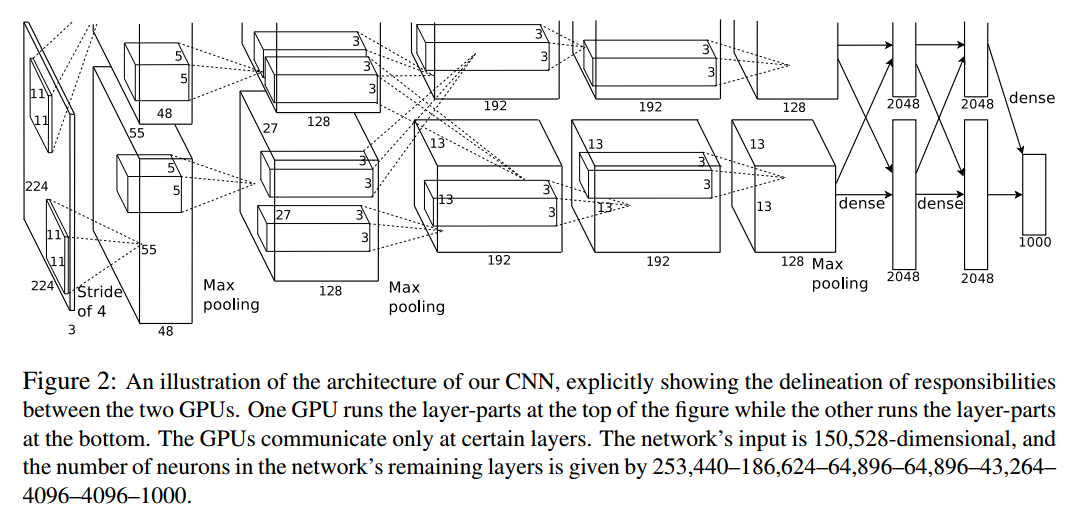

In [1]:
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import data as gdata, nn
import os
import sys

net = nn.Sequential()
# 使用较大的11 x 11窗口来捕获物体。同时使用步幅4来较大幅度减小输出高和宽。这里使用的输出通
# 道数比LeNet中的也要大很多
net.add(nn.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
        nn.Conv2D(256, kernel_size=5, padding=2, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 连续3个卷积层，且使用更小的卷积窗口。除了最后的卷积层外，进一步增大了输出通道数。
        # 前两个卷积层后不使用池化层来减小输入的高和宽
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(384, kernel_size=3, padding=1, activation='relu'),
        nn.Conv2D(256, kernel_size=3, padding=1, activation='relu'),
        nn.MaxPool2D(pool_size=3, strides=2),
        # 这里全连接层的输出个数比LeNet中的大数倍。使用丢弃层来缓解过拟合
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        nn.Dense(4096, activation="relu"), nn.Dropout(0.5),
        # 输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
        nn.Dense(10))

我们构造一个高和宽均为224的单通道数据样本来观察每一层的输出形状。

In [2]:
X = nd.random.uniform(shape=(1, 1, 224, 224))
net.initialize()
for layer in net:
    X = layer(X)
    print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 96, 54, 54)
pool0 output shape:	 (1, 96, 26, 26)
conv1 output shape:	 (1, 256, 26, 26)
pool1 output shape:	 (1, 256, 12, 12)
conv2 output shape:	 (1, 384, 12, 12)
conv3 output shape:	 (1, 384, 12, 12)
conv4 output shape:	 (1, 256, 12, 12)
pool2 output shape:	 (1, 256, 5, 5)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


## 读取数据

虽然论文中AlexNet使用ImageNet数据集，但因为ImageNet数据集训练时间较长，我们仍用前面的Fashion-MNIST数据集来演示AlexNet。读取数据的时候我们额外做了一步将图像高和宽扩大到AlexNet使用的图像高和宽224。这个可以通过`Resize`实例来实现。也就是说，我们在`ToTensor`实例前使用`Resize`实例，然后使用`Compose`实例来将这两个变换串联以方便调用。

In [4]:
# 本函数已保存在d2lzh包中方便以后使用
def load_data_fashion_mnist(batch_size, resize=None, root=os.path.join(
        '~', '.mxnet', 'datasets', 'fashion-mnist')):
    root = os.path.expanduser(root)  # 展开用户路径'~'
    transformer = []
    if resize:
        transformer += [gdata.vision.transforms.Resize(resize)]
    transformer += [gdata.vision.transforms.ToTensor()]
    transformer = gdata.vision.transforms.Compose(transformer)
    mnist_train = gdata.vision.FashionMNIST(root=root, train=True)
    mnist_test = gdata.vision.FashionMNIST(root=root, train=False)
    num_workers = 0 if sys.platform.startswith('win32') else 4
    train_iter = gdata.DataLoader(
        mnist_train.transform_first(transformer), batch_size, shuffle=True,
        num_workers=num_workers)
    test_iter = gdata.DataLoader(
        mnist_test.transform_first(transformer), batch_size, shuffle=False,
        num_workers=num_workers)
    return train_iter, test_iter

batch_size = 128
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

## 训练

这时候我们可以开始训练AlexNet了。相对于上一节的LeNet，这里的主要改动是使用了更小的学习率。

In [5]:
lr, num_epochs, ctx = 0.01, 5, d2l.try_gpu()
net.initialize(force_reinit=True, ctx=ctx, init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})
d2l.train_ch5(net, train_iter, test_iter, batch_size, trainer, ctx, num_epochs)

training on cpu(0)


KeyboardInterrupt: 

## 小结

* AlexNet跟LeNet结构类似，但使用了更多的卷积层和更大的参数空间来拟合大规模数据集ImageNet。它是浅层神经网络和深度神经网络的分界线。
* 虽然看上去AlexNet的实现比LeNet的实现也就多了几行代码而已，但这个观念上的转变和真正优秀实验结果的产生令学术界付出了很多年。

## 练习

* 尝试增加迭代周期。跟LeNet的结果相比，AlexNet的结果有什么区别？为什么？
* AlexNet对Fashion-MNIST数据集来说可能过于复杂。试着简化模型来使训练更快，同时保证准确率不明显下降。
* 修改批量大小，观察准确率和内存或显存的变化。




## 参考文献

[1] Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. In Advances in neural information processing systems (pp. 1097-1105).